In [1]:
#heir clust
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
data=pd.read_csv("C:\\Users\\advay\\Downloads\\Assignment 7\\Airline Assign 7 Q1 q.csv")

In [3]:
data.head()

,ID,Balance,Qual miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
data.shape

(3999, 12)

In [6]:
data1=data.drop(['ID'],axis=1)

In [7]:
data1.head()

,Balance,Qual miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
data1.shape

(3999, 11)

In [35]:
#MinMax Scaler 
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [10]:
df=norm_func(data1.iloc[:,0:])

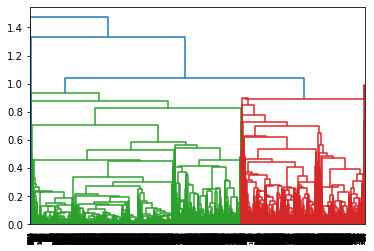

In [11]:
#dendrogram
dendrogram=sch.dendrogram(sch.linkage(df,method='centroid'))

In [12]:
#creating clusters 
HC=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [13]:
y_HC=HC.fit_predict(df)
Clusters_hc=pd.DataFrame(y_HC,columns=['Clusters_hc'])

In [14]:
Clusters_hc.value_counts()

Clusters_hc
0              2495
2              1144
1               325
4                31
3                 4
dtype: int64

In [15]:
data2=pd.concat([data1,Clusters_hc],axis=1)

In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [17]:
#DBScan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [18]:

array=data1.values

In [19]:
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [20]:
sdscaler=StandardScaler().fit(array)
X=sdscaler.transform(array)

In [21]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [22]:
dbscan=DBSCAN(eps=0.8,min_samples=11)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=11)

In [23]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [24]:
clus=pd.DataFrame(dbscan.labels_,columns=['cluster_dbscan'])

In [25]:
clus

,cluster_dbscan
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [26]:
clus.value_counts()

cluster_dbscan
 0                2142
-1                 943
 1                 887
 3                  15
 2                  12
dtype: int64

In [27]:
pd.concat([data2,clus],axis=1)

,Balance,Qual miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters_hc,cluster_dbscan
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,2,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [28]:
#Clusters from K-Means 
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [29]:
model=KMeans(n_clusters=5) 
model.fit(df)
model.labels_

array([0, 0, 0, ..., 3, 4, 4])

In [30]:
model=pd.Series(model.labels_)
data2['Cluster_kmeans']=model
df.head()

,Balance,Qual miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [31]:
data2

,Balance,Qual miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters_hc,Cluster_kmeans
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,2,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,4


In [32]:
model

0       0
1       0
2       0
3       0
4       3
       ..
3994    1
3995    1
3996    3
3997    4
3998    4
Length: 3999, dtype: int32

In [33]:
model.value_counts()

4    1032
0     868
3     808
1     673
2     618
dtype: int64

In [34]:
pd.concat([data2],axis=1)

,Balance,Qual miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters_hc,Cluster_kmeans
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,2,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,4
